# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Задание 3. Работа с пропусками

Рассчитать количество выбросов для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [178]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
!ls

horse_data.csv	horse_data.names  stat_basics-Copy1.ipynb  stat_basics.ipynb


In [179]:
horses = pd.read_csv('horse_data.csv', header=None)
horses.columns = ['1_surgery', '2_Age', '3_Hospital Number',
                  '4_rectal temperature', '5_pulse', '6_respiratory rate',
                  '7_temperature of extremities', '8_peripheral pulse',
                  '9_mucous membranes',  '10_capillary refill time',
                  '11_pain', '12_peristalsis', '13_abdominal distension',
                  '14_nasogastric tube', '15_nasogastric reflux','16_nasogastric reflux PH',
                  '17_rectal examination', '18_abdomen', '19_packed cell volume',
                  '20_total protein', '21_abdominocentesis', '22_abdomcentesis total protein',
                  '23_outcome', '24_surgical lesion','25_lesion', '26_lesion', '27_lesion',
                  '28_cp_data']
horses.head(1)

,1_surgery,2_Age,3_Hospital Number,4_rectal temperature,5_pulse,6_respiratory rate,7_temperature of extremities,8_peripheral pulse,9_mucous membranes,10_capillary refill time,...,19_packed cell volume,20_total protein,21_abdominocentesis,22_abdomcentesis total protein,23_outcome,24_surgical lesion,25_lesion,26_lesion,27_lesion,28_cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2


In [180]:
horses.replace('?', np.nan, inplace=True)
horses

,1_surgery,2_Age,3_Hospital Number,4_rectal temperature,5_pulse,6_respiratory rate,7_temperature of extremities,8_peripheral pulse,9_mucous membranes,10_capillary refill time,...,19_packed cell volume,20_total protein,21_abdominocentesis,22_abdomcentesis total protein,23_outcome,24_surgical lesion,25_lesion,26_lesion,27_lesion,28_cp_data
0,2,1,530101,38.50,66,28,3,3,NaN,2,...,45.00,8.40,NaN,NaN,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,NaN,NaN,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,NaN,NaN,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,NaN,NaN,6,2,...,74.00,7.40,NaN,NaN,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,NaN,120,70,4,NaN,4,2,...,55,65,NaN,NaN,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,NaN,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,NaN,NaN,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


In [181]:
horses.isna().mean() #.sum()

1_surgery                         0.003333
2_Age                             0.000000
3_Hospital Number                 0.000000
4_rectal temperature              0.200000
5_pulse                           0.080000
6_respiratory rate                0.193333
7_temperature of extremities      0.186667
8_peripheral pulse                0.230000
9_mucous membranes                0.156667
10_capillary refill time          0.106667
11_pain                           0.183333
12_peristalsis                    0.146667
13_abdominal distension           0.186667
14_nasogastric tube               0.346667
15_nasogastric reflux             0.353333
16_nasogastric reflux PH          0.823333
17_rectal examination             0.340000
18_abdomen                        0.393333
19_packed cell volume             0.096667
20_total protein                  0.110000
21_abdominocentesis               0.550000
22_abdomcentesis total protein    0.660000
23_outcome                        0.003333
24_surgical

In [182]:
# удаляем колонки с количеством NaN > 80
n_nan = 80
horses.dropna(axis=1, thresh=300-n_nan, inplace=True)
horses.isna().sum()

1_surgery                        1
2_Age                            0
3_Hospital Number                0
4_rectal temperature            60
5_pulse                         24
6_respiratory rate              58
7_temperature of extremities    56
8_peripheral pulse              69
9_mucous membranes              47
10_capillary refill time        32
11_pain                         55
12_peristalsis                  44
13_abdominal distension         56
19_packed cell volume           29
20_total protein                33
23_outcome                       1
24_surgical lesion               0
25_lesion                        0
26_lesion                        0
27_lesion                        0
28_cp_data                       0
dtype: int64

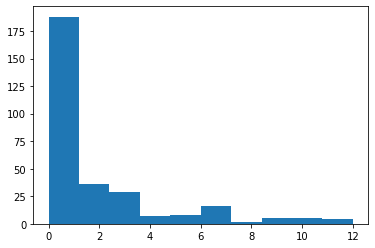

In [183]:
# Гистограмма распределения количества NaN в строках
# Есть небольшое количество строк с количеством отсутствующих занчений более 50 %
# В дальнейшем, в зависимости от задачи их можно удалить
plt.hist(horses.isna().sum(1));

In [184]:
# horses.dropna(axis=0, thresh=11, inplace=True)
horses

,1_surgery,2_Age,3_Hospital Number,4_rectal temperature,5_pulse,6_respiratory rate,7_temperature of extremities,8_peripheral pulse,9_mucous membranes,10_capillary refill time,...,12_peristalsis,13_abdominal distension,19_packed cell volume,20_total protein,23_outcome,24_surgical lesion,25_lesion,26_lesion,27_lesion,28_cp_data
0,2,1,530101,38.50,66,28,3,3,NaN,2,...,4,4,45.00,8.40,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,NaN,NaN,4,1,...,4,2,50,85,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,3,1,33.00,6.70,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,4,4,48.00,7.20,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,NaN,NaN,6,2,...,NaN,NaN,74.00,7.40,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,NaN,120,70,4,NaN,4,2,...,4,NaN,55,65,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,3,3,44.00,NaN,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,4,3,60.00,6.80,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,3,3,50.00,6.00,1,1,2208,0,0,1


In [185]:
## Заполняем пропущенные значения NaN
#  Если количетво уникальных значений в колонке меньше шести,
# то это скорее всего категориальные или упорядоченные категориальные типы данных,
# им присваиваем тип 'int8' и NaN заменяем модой
# В оставшихся случаях NaN заменяем модой медианой

for col in horses.columns:
    horses[col] = pd.to_numeric(horses[col], errors='coerce', )
    if horses[col].nunique() <= 6:
        horses[col].fillna(horses[col].mode()[0], inplace=True)
        horses[col] = horses[col].astype('int8')   
    else:
        horses[col].fillna(horses[col].median(), inplace=True)
       
horses.dtypes

1_surgery                          int8
2_Age                              int8
3_Hospital Number                 int64
4_rectal temperature            float64
5_pulse                         float64
6_respiratory rate              float64
7_temperature of extremities       int8
8_peripheral pulse                 int8
9_mucous membranes                 int8
10_capillary refill time           int8
11_pain                            int8
12_peristalsis                     int8
13_abdominal distension            int8
19_packed cell volume           float64
20_total protein                float64
23_outcome                         int8
24_surgical lesion                 int8
25_lesion                         int64
26_lesion                          int8
27_lesion                          int8
28_cp_data                         int8
dtype: object

In [186]:
print(horses.isna().sum())

1_surgery                       0
2_Age                           0
3_Hospital Number               0
4_rectal temperature            0
5_pulse                         0
6_respiratory rate              0
7_temperature of extremities    0
8_peripheral pulse              0
9_mucous membranes              0
10_capillary refill time        0
11_pain                         0
12_peristalsis                  0
13_abdominal distension         0
19_packed cell volume           0
20_total protein                0
23_outcome                      0
24_surgical lesion              0
25_lesion                       0
26_lesion                       0
27_lesion                       0
28_cp_data                      0
dtype: int64


In [187]:
horses

,1_surgery,2_Age,3_Hospital Number,4_rectal temperature,5_pulse,6_respiratory rate,7_temperature of extremities,8_peripheral pulse,9_mucous membranes,10_capillary refill time,...,12_peristalsis,13_abdominal distension,19_packed cell volume,20_total protein,23_outcome,24_surgical lesion,25_lesion,26_lesion,27_lesion,28_cp_data
0,2,1,530101,38.5,66.0,28.0,3,3,1,2,...,4,4,45.0,8.4,2,2,11300,0,0,2
1,1,1,534817,39.2,88.0,20.0,3,1,4,1,...,4,2,50.0,85.0,3,2,2208,0,0,2
2,2,1,530334,38.3,40.0,24.0,1,1,3,1,...,3,1,33.0,6.7,1,2,0,0,0,1
3,1,9,5290409,39.1,164.0,84.0,4,1,6,2,...,4,4,48.0,7.2,2,1,2208,0,0,1
4,2,1,530255,37.3,104.0,35.0,3,1,6,2,...,3,1,74.0,7.4,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,38.2,120.0,70.0,4,1,4,2,...,4,1,55.0,65.0,3,2,3205,0,0,2
296,2,1,527702,37.2,72.0,24.0,3,2,4,2,...,3,3,44.0,7.5,3,1,2208,0,0,1
297,1,1,529386,37.5,72.0,30.0,4,3,4,1,...,4,3,60.0,6.8,2,1,3205,0,0,2
298,1,1,530612,36.5,100.0,24.0,3,3,3,1,...,3,3,50.0,6.0,1,1,2208,0,0,1


In [188]:
# Описательные статистики
horses.describe()

,1_surgery,2_Age,3_Hospital Number,4_rectal temperature,5_pulse,6_respiratory rate,7_temperature of extremities,8_peripheral pulse,9_mucous membranes,10_capillary refill time,...,12_peristalsis,13_abdominal distension,19_packed cell volume,20_total protein,23_outcome,24_surgical lesion,25_lesion,26_lesion,27_lesion,28_cp_data
count,300.000000,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.396667,1.640000,1.085889e+06,38.174333,71.280000,29.273333,2.470000,1.783333,2.563333,1.273333,...,2.930000,2.030000,46.170000,22.591667,1.550000,1.363333,3657.880000,0.626667,-0.316667,1.670000
std,0.490023,2.173972,1.529801e+06,0.654831,27.541545,16.010979,0.975845,1.009846,1.633468,0.461156,...,0.902486,1.079963,9.908584,26.453849,0.736642,0.481763,5399.513513,9.092278,5.484828,0.470998
min,1.000000,1.000000,5.184760e+05,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,23.000000,3.300000,1.000000,1.000000,0.000000,-57.000000,-95.000000,1.000000
25%,1.000000,1.000000,5.289040e+05,37.900000,48.000000,20.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,39.000000,6.600000,1.000000,1.000000,2111.750000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,5.303055e+05,38.200000,64.000000,24.500000,3.000000,1.000000,2.000000,1.000000,...,3.000000,2.000000,45.000000,7.500000,1.000000,1.000000,2673.500000,0.000000,0.000000,2.000000
75%,2.000000,1.000000,5.347275e+05,38.500000,88.000000,34.250000,3.000000,3.000000,4.000000,2.000000,...,3.000000,3.000000,50.000000,53.250000,2.000000,2.000000,3209.000000,0.000000,0.000000,2.000000
max,2.000000,9.000000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,3.000000,...,4.000000,4.000000,75.000000,89.000000,3.000000,2.000000,41110.000000,120.000000,0.000000,2.000000


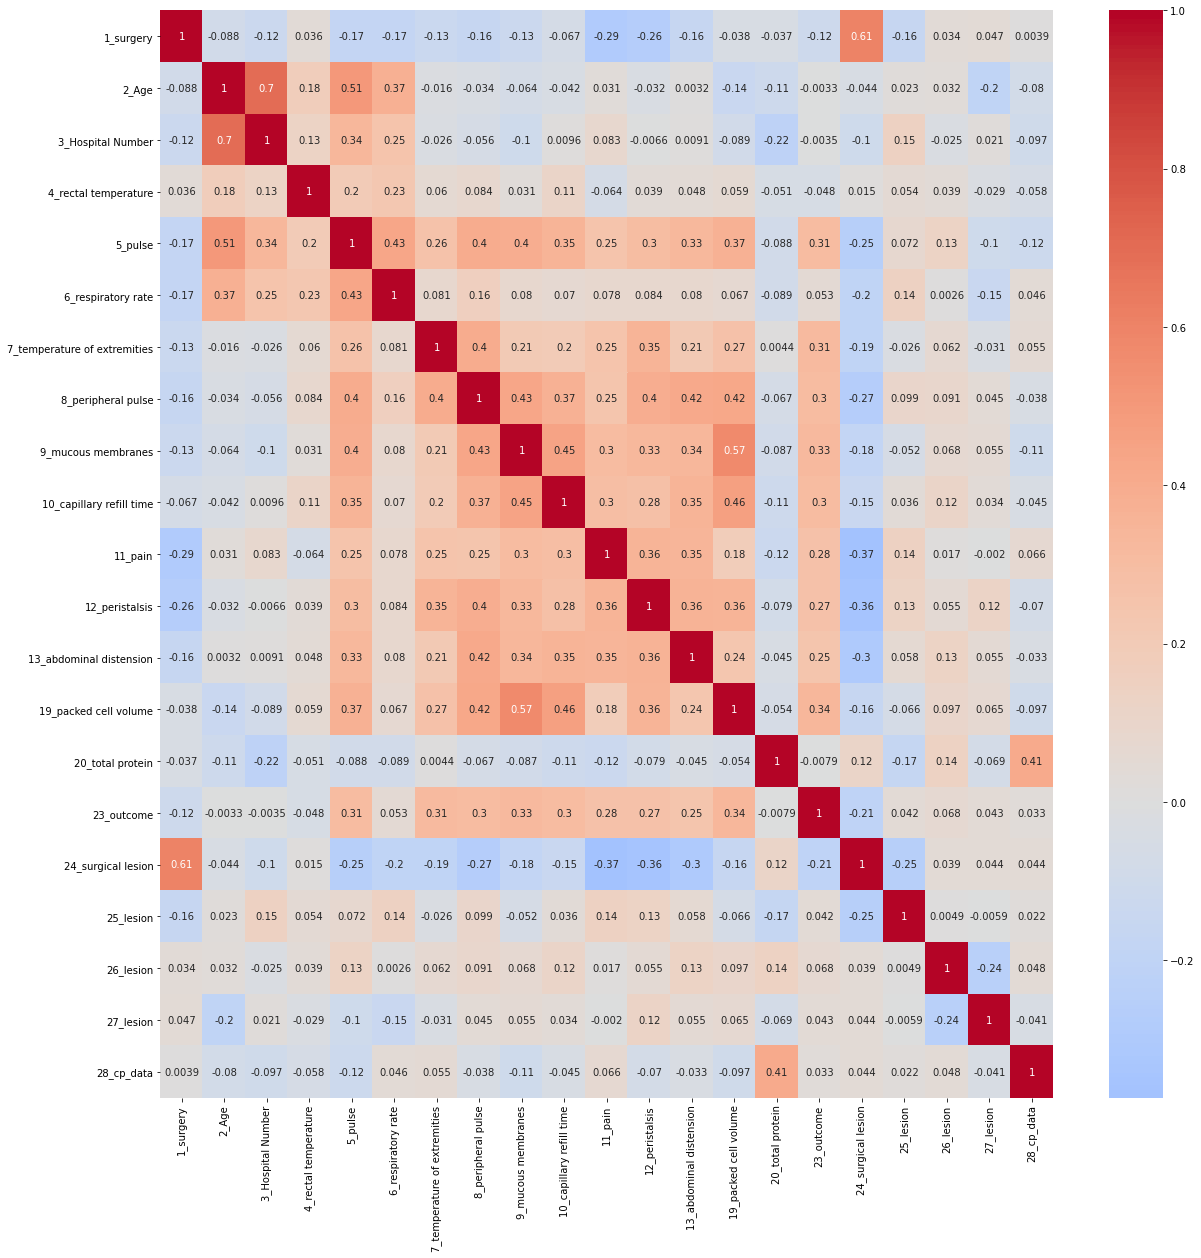

In [189]:
plt.subplots(figsize=(20, 20))
sns.heatmap(horses.corr(), annot = True, center= 0, cmap= 'coolwarm');

## Работа с выбросами

In [1]:
# Рассмотрим категориальные типы данных
for col in horses.columns:
    if horses[col].dtype in ['int8', 'int64']:
        fig1, ax1 = plt.subplots()
        ax1.set_title(col)
        ax1.boxplot(horses[col])

NameError: name 'horses' is not defined

In [200]:
# Для категориальных типов данных признаки  должны принимать одно из дискретных значений.
# Например
# Для признака возраст, где признаки могут быть двух значений (из описания датасета)
#           1 = Adult horse
#           2 = Young (< 6 months)
# есть несколько строк со значением 9 - здесь нужно разбираться что это означает
horses[horses['2_Age'] > 2]

,1_surgery,2_Age,3_Hospital Number,4_rectal temperature,5_pulse,6_respiratory rate,7_temperature of extremities,8_peripheral pulse,9_mucous membranes,10_capillary refill time,...,12_peristalsis,13_abdominal distension,19_packed cell volume,20_total protein,23_outcome,24_surgical lesion,25_lesion,26_lesion,27_lesion,28_cp_data
3,1,9,5290409,39.1,164.0,84.0,4,1,6,2,...,4,4,48.0,7.2,2,1,2208,0,0,1
9,2,9,5299629,38.3,90.0,24.5,1,1,1,1,...,3,1,40.0,6.2,1,2,0,0,0,1
13,2,9,5291329,38.0,92.0,28.0,1,1,2,1,...,3,2,37.0,6.1,2,2,0,0,0,1
16,1,9,5301219,38.2,128.0,36.0,3,3,4,2,...,4,3,53.0,7.8,2,2,1400,0,0,1
23,1,9,534998,38.3,130.0,60.0,3,3,1,1,...,4,1,50.0,70.0,1,1,3111,0,0,2
39,1,9,5277409,39.2,146.0,96.0,3,1,1,1,...,3,1,45.0,7.5,2,1,2113,0,0,2
41,2,9,5288249,39.0,150.0,72.0,3,1,1,1,...,3,1,47.0,8.5,1,1,9400,0,0,1
55,1,9,5282839,38.6,160.0,20.0,3,1,5,1,...,3,4,38.0,7.5,2,1,7111,0,0,1
74,1,9,5292929,38.2,64.0,24.5,3,1,1,1,...,3,1,37.0,4.9,2,1,11124,0,0,2
75,1,9,534092,39.7,100.0,24.5,3,3,5,2,...,3,1,48.0,57.0,3,1,1400,0,0,2


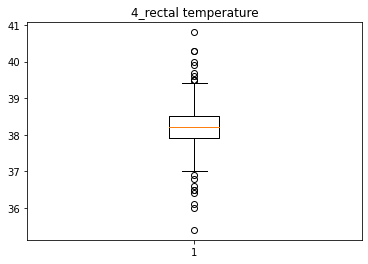

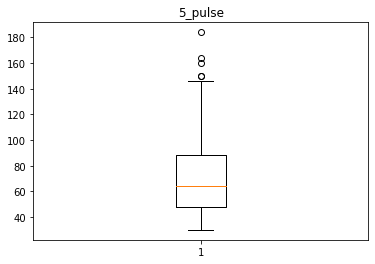

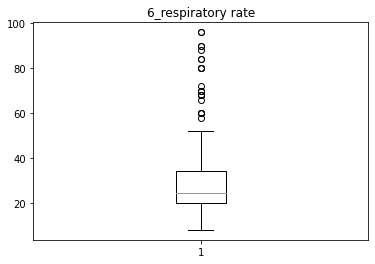

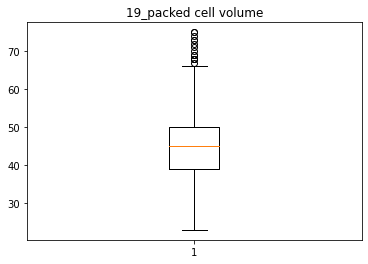

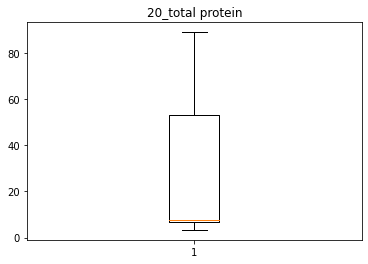

In [190]:
#Определим выбросы для колонок с непрерывными типами данных
for col in horses.columns:
    if horses[col].dtype in ['float64']:
        fig1, ax1 = plt.subplots()
        ax1.set_title(col)
        ax1.boxplot(horses[col])

35.4 40.8


,1_surgery,2_Age,3_Hospital Number,4_rectal temperature,5_pulse,6_respiratory rate,7_temperature of extremities,8_peripheral pulse,9_mucous membranes,10_capillary refill time,...,12_peristalsis,13_abdominal distension,19_packed cell volume,20_total protein,23_outcome,24_surgical lesion,25_lesion,26_lesion,27_lesion,28_cp_data
44,1,1,535407,35.4,140.0,24.0,3,3,4,2,...,4,1,57.0,69.0,3,1,3205,0,0,2
259,1,1,527734,40.8,72.0,42.0,3,3,1,1,...,3,1,54.0,7.4,2,1,11400,0,0,1


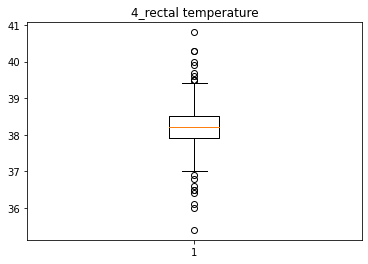

In [154]:
# Нормальная температура тела взрослой лошади — 37,5-38,5 градуса. 
# Если показатель выше или ниже нормы, то животное заболело.
# Правда, незначительное повышение до 39,4 градуса допускается.
# Обычно температура повышается после физической нагрузки. 
# У здоровых жеребят она доходит до 39 градусов.
col = '4_rectal temperature'
fig1, ax1 = plt.subplots()
ax1.set_title(col)
ax1.boxplot(horses[col]);
print(horses[col].min(), horses[col].max(), )
# Логически, тут нет явных выбросов, поэтому эту колонку я бы оставил без изменений
horses[(horses[col] == horses[col].min()) | (horses[col] == horses[col].max())]
# Лошадь с минимальной температурой была усыплена, с максимальной не выжила

30.0 184.0


,1_surgery,2_Age,3_Hospital Number,4_rectal temperature,5_pulse,6_respiratory rate,7_temperature of extremities,8_peripheral pulse,9_mucous membranes,10_capillary refill time,...,12_peristalsis,13_abdominal distension,19_packed cell volume,20_total protein,23_outcome,24_surgical lesion,25_lesion,26_lesion,27_lesion,28_cp_data
3,1,9,5290409,39.1,164.0,84.0,4,1,6,2,...,4,4,48.0,7.2,2,1,2208,0,0,1
41,2,9,5288249,39.0,150.0,72.0,3,1,1,1,...,3,1,47.0,8.5,1,1,9400,0,0,1
55,1,9,5282839,38.6,160.0,20.0,3,1,5,1,...,3,4,38.0,7.5,2,1,7111,0,0,1
255,1,9,5294539,38.8,184.0,84.0,1,1,1,1,...,1,3,33.0,3.3,2,1,7111,0,0,2
275,1,9,5297159,38.8,150.0,50.0,1,3,6,2,...,3,2,50.0,6.2,2,1,4207,0,0,2


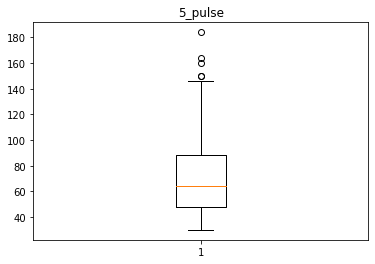

In [156]:
# У здоровой лошади пульс должен равняться 36-42 ударам за минуту
# при рабочей нагрузке 120-150 уд/мин
col = '5_pulse'
fig1, ax1 = plt.subplots()
ax1.set_title(col)
ax1.boxplot(horses[col]);
print(horses[col].min(), horses[col].max(), )
# Логически, тут нет явных выбросов, поэтому эту колонку я бы оставил без изменений
horses[(horses[col] >= 150)]

8.0 96.0


,1_surgery,2_Age,3_Hospital Number,4_rectal temperature,5_pulse,6_respiratory rate,7_temperature of extremities,8_peripheral pulse,9_mucous membranes,10_capillary refill time,...,12_peristalsis,13_abdominal distension,19_packed cell volume,20_total protein,23_outcome,24_surgical lesion,25_lesion,26_lesion,27_lesion,28_cp_data
0,2,1,530101,38.5,66.0,28.0,3,3,1,2,...,4,4,45.0,8.4,2,2,11300,0,0,2
2,2,1,530334,38.3,40.0,24.0,1,1,3,1,...,3,1,33.0,6.7,1,2,0,0,0,1
3,1,9,5290409,39.1,164.0,84.0,4,1,6,2,...,4,4,48.0,7.2,2,1,2208,0,0,1
4,2,1,530255,37.3,104.0,35.0,3,1,6,2,...,3,1,74.0,7.4,2,2,4300,0,0,2
5,2,1,528355,38.2,64.0,24.5,2,1,3,1,...,3,2,45.0,7.5,1,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,1,1,534004,38.2,78.0,24.0,3,3,3,1,...,3,1,43.0,62.0,3,2,2209,0,0,2
295,1,1,533886,38.2,120.0,70.0,4,1,4,2,...,4,1,55.0,65.0,3,2,3205,0,0,2
296,2,1,527702,37.2,72.0,24.0,3,2,4,2,...,3,3,44.0,7.5,3,1,2208,0,0,1
297,1,1,529386,37.5,72.0,30.0,4,3,4,1,...,4,3,60.0,6.8,2,1,3205,0,0,2


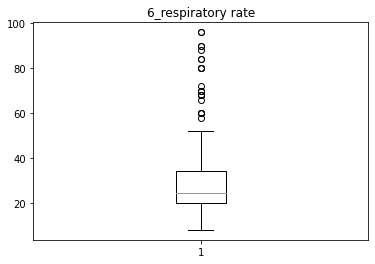

In [169]:
# частота дыхания
# - нормальная оценка от 8 до 10 - в некоторых источниках до 24
col = '6_respiratory rate'
fig1, ax1 = plt.subplots()
ax1.set_title(col)
ax1.boxplot(horses[col]);
print(horses[col].min(), horses[col].max(), )
# 66% лошадей с ненормальным дыханием
horses[(horses[col] >= 24) | (horses[col] <= 8)]

In [171]:
q1 = horses[col].quantile(0.25)
q3 = horses[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
q1, q3, iqr * 1.5, lower_bound, upper_bound

(20.0, 34.25, 21.375, -1.375, 55.625)

In [174]:
# Не думаю что нужно считать выбросом частоту дыхания более 55.625,
# расчетом через межкваритильный размах
# Возможно, для нездоровых лошадей это "нормально"

horses[(horses[col] >= 70)] # 55.625

,1_surgery,2_Age,3_Hospital Number,4_rectal temperature,5_pulse,6_respiratory rate,7_temperature of extremities,8_peripheral pulse,9_mucous membranes,10_capillary refill time,...,12_peristalsis,13_abdominal distension,19_packed cell volume,20_total protein,23_outcome,24_surgical lesion,25_lesion,26_lesion,27_lesion,28_cp_data
3,1,9,5290409,39.1,164.0,84.0,4,1,6,2,...,4,4,48.0,7.2,2,1,2208,0,0,1
39,1,9,5277409,39.2,146.0,96.0,3,1,1,1,...,3,1,45.0,7.5,2,1,2113,0,0,2
41,2,9,5288249,39.0,150.0,72.0,3,1,1,1,...,3,1,47.0,8.5,1,1,9400,0,0,1
82,1,9,5290759,38.1,100.0,80.0,3,1,2,1,...,4,1,36.0,5.7,1,1,3111,0,0,2
84,1,1,529849,37.8,60.0,80.0,1,3,2,2,...,3,3,40.0,4.5,1,1,5206,0,0,1
106,1,1,528668,38.3,52.0,96.0,3,3,3,1,...,3,1,43.0,6.1,1,1,3209,0,0,1
186,1,1,5278331,39.3,64.0,90.0,2,3,1,1,...,3,1,39.0,6.7,1,1,21110,0,0,2
208,1,1,535338,37.8,88.0,80.0,3,3,5,2,...,3,3,64.0,89.0,3,1,3205,0,0,2
229,1,9,534597,38.5,120.0,70.0,3,1,1,1,...,1,1,35.0,54.0,1,1,4205,39,-95,2
244,1,9,5291409,38.2,124.0,88.0,1,3,2,1,...,3,4,47.0,8.0,1,1,9400,0,0,1


23.0 75.0


,1_surgery,2_Age,3_Hospital Number,4_rectal temperature,5_pulse,6_respiratory rate,7_temperature of extremities,8_peripheral pulse,9_mucous membranes,10_capillary refill time,...,12_peristalsis,13_abdominal distension,19_packed cell volume,20_total protein,23_outcome,24_surgical lesion,25_lesion,26_lesion,27_lesion,28_cp_data
1,1,1,534817,39.2,88.0,20.0,3,1,4,1,...,4,2,50.0,85.0,3,2,2208,0,0,2
4,2,1,530255,37.3,104.0,35.0,3,1,6,2,...,3,1,74.0,7.4,2,2,4300,0,0,2
11,2,1,527927,39.1,72.0,52.0,2,1,2,1,...,1,2,50.0,7.8,1,1,2111,0,0,2
16,1,9,5301219,38.2,128.0,36.0,3,3,4,2,...,4,3,53.0,7.8,2,2,1400,0,0,1
19,2,1,532110,39.4,110.0,35.0,4,3,6,1,...,3,3,55.0,8.7,1,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2,9,5305129,39.5,84.0,30.0,3,1,1,1,...,3,1,28.0,5.0,1,2,0,0,0,2
291,1,1,528890,38.9,80.0,44.0,3,3,3,1,...,3,3,54.0,6.5,2,1,7111,0,0,2
295,1,1,533886,38.2,120.0,70.0,4,1,4,2,...,4,1,55.0,65.0,3,2,3205,0,0,2
297,1,1,529386,37.5,72.0,30.0,4,3,4,1,...,4,3,60.0,6.8,2,1,3205,0,0,2


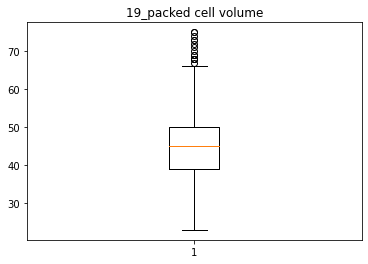

In [176]:
# количество эритроцитов в крови по объему
#           - нормальный диапазон от 30 до 50. 
col = '19_packed cell volume'
fig1, ax1 = plt.subplots()
ax1.set_title(col)
ax1.boxplot(horses[col]);
print(horses[col].min(), horses[col].max(), )

horses[(horses[col] >= 50) | (horses[col] <= 30)]

In [177]:
# Опять-таки иммем дело с нездоровыми лошальми, 
# потому скорее  никаких искаженных данных тут нет
q1 = horses[col].quantile(0.25)
q3 = horses[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
q1, q3, iqr * 1.5, lower_bound, upper_bound

(39.0, 50.0, 16.5, 22.5, 66.5)

3.3 89.0


,1_surgery,2_Age,3_Hospital Number,4_rectal temperature,5_pulse,6_respiratory rate,7_temperature of extremities,8_peripheral pulse,9_mucous membranes,10_capillary refill time,...,12_peristalsis,13_abdominal distension,19_packed cell volume,20_total protein,23_outcome,24_surgical lesion,25_lesion,26_lesion,27_lesion,28_cp_data
0,2,1,530101,38.5,66.0,28.0,3,3,1,2,...,4,4,45.0,8.4,2,2,11300,0,0,2
1,1,1,534817,39.2,88.0,20.0,3,1,4,1,...,4,2,50.0,85.0,3,2,2208,0,0,2
5,2,1,528355,38.2,64.0,24.5,2,1,3,1,...,3,2,45.0,7.5,1,2,0,0,0,2
7,1,1,529607,38.2,60.0,24.5,3,1,1,1,...,4,2,44.0,8.3,2,1,2208,0,0,2
10,1,1,528548,38.1,66.0,12.0,3,3,5,1,...,3,1,44.0,6.0,1,1,2124,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2,1,533902,38.5,40.0,16.0,1,1,1,1,...,1,1,37.0,67.0,1,2,0,0,0,2
295,1,1,533886,38.2,120.0,70.0,4,1,4,2,...,4,1,55.0,65.0,3,2,3205,0,0,2
296,2,1,527702,37.2,72.0,24.0,3,2,4,2,...,3,3,44.0,7.5,3,1,2208,0,0,1
298,1,1,530612,36.5,100.0,24.0,3,3,3,1,...,3,3,50.0,6.0,1,1,2208,0,0,1


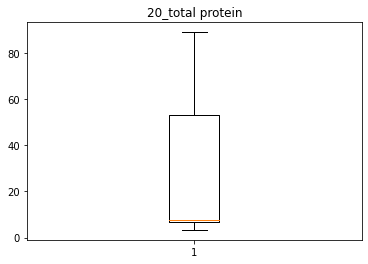

In [193]:

# общий белок

#           - нормальные значения лежат в диапазоне 6-7,5 (г / дл)
col = '20_total protein'
fig1, ax1 = plt.subplots()
ax1.set_title(col)
ax1.boxplot(horses[col]);
print(horses[col].min(), horses[col].max(), )

horses[(horses[col] >= 7.5) | (horses[col] <= 6)]

In [195]:

# C точки зрения расчета выбросов через межкваритильный размах
# в этой колонке выбросов нет
q1 = horses[col].quantile(0.25)
q3 = horses[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print(q1, q3, iqr * 1.5, lower_bound, upper_bound)
horses[(horses[col] >= upper_bound) | (horses[col] <= lower_bound)]

6.6 53.25 69.975 -63.37499999999999 123.225


,1_surgery,2_Age,3_Hospital Number,4_rectal temperature,5_pulse,6_respiratory rate,7_temperature of extremities,8_peripheral pulse,9_mucous membranes,10_capillary refill time,...,12_peristalsis,13_abdominal distension,19_packed cell volume,20_total protein,23_outcome,24_surgical lesion,25_lesion,26_lesion,27_lesion,28_cp_data


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.